# Análise da diferença salarial para trabalhadores de TI conforme a escolaridade de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a escolaridade de cada indivíduo em 2021.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [2]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV :

In [3]:
# Leitura da tabela de dados gerais:
RAIS_GERAL_2021 = pd.read_csv("C:/Users/leila/estagio/data/raw/DATA_RAIS_GERAL_2021.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2021.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de escolaridade para utilização correta:

In [4]:
# Retirando dados referentes a indivíduos com escolaridade 1 (Analfabeto):
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021['Escolaridade'] != 1]

# Retirando dados referentes a indivíduos com escolaridade 2 (Fundamental Incompleto):
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021['Escolaridade'] != 2]

# Retirando dados referentes a indivíduos com escolaridade 3 (Fundamental Incompleto):
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021['Escolaridade'] != 3]

# Retirando dados referentes a indivíduos com escolaridade 4 (Fundamental Incompleto):
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021['Escolaridade'] != 4]

# Substituindo o status de médio incompleto (6) para fundamental completo:
RAIS_GERAL_2021['Escolaridade'] = RAIS_GERAL_2021['Escolaridade'].replace(6, 5).replace(6, 5)

# Substituindo o status de superior incompleto (6) para médio completo:

RAIS_GERAL_2021['Escolaridade'] = RAIS_GERAL_2021['Escolaridade'].replace(8, 7).replace(8, 7)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [5]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2021
# até 09/2023 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2021 = 1.01122970

RAIS_GERAL_2021["Remuneração"] = RAIS_GERAL_2021["Remuneração"] * fator_correcao_inflacao_2021

### Exibição da tabela geraL:

In [6]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2021.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
15,MS,142530,77331,5,44,2,"3,787.36",1
16,MS,317210,62031,5,18,9,"1,118.09",1
17,MS,317210,62031,5,37,8,"1,866.95",1
18,MS,317120,60101,5,47,8,"2,133.37",1
19,MS,142510,47113,5,26,8,"3,511.05",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [7]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2021_QNT = pd.crosstab(RAIS_GERAL_2021["Escolaridade"], RAIS_GERAL_2021["Sexo"].replace(sexo))
RAIS_GERAL_2021_QNT.insert(1, "% Fem.", RAIS_GERAL_2021_QNT["Fem."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)
RAIS_GERAL_2021_QNT.insert(3, "% Masc.", RAIS_GERAL_2021_QNT["Masc."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)

RAIS_GERAL_2021_QNT.rename(index = escol, inplace = True)

RAIS_GERAL_2021_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Escolaridade,,,,
Fundamental Completo,1702,19.26,7134,80.74
Médio Completo,45351,18.63,198121,81.37
Superior Completo,89471,21.66,323646,78.34
Mestrado,2552,23.74,8200,76.26
Doutorado,626,23.19,2074,76.81


In [8]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2021_QNT["Total"] = RAIS_GERAL_2021_QNT["% Masc."] + RAIS_GERAL_2021_QNT["% Fem."]
RAIS_GERAL_2021_QNT["Ano"] = "2021"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2021_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

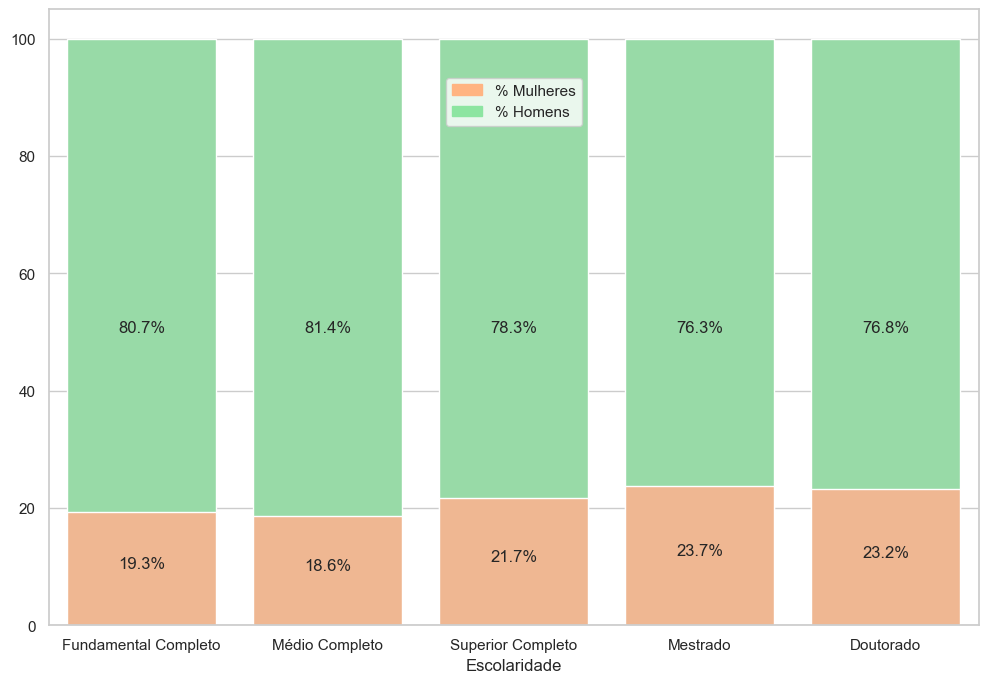

In [10]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Escolaridade", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')
   

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="Escolaridade", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/leila/estagio/data/figures/svg/qnt_sexo_escolaridade.svg")

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela escolaridade:

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

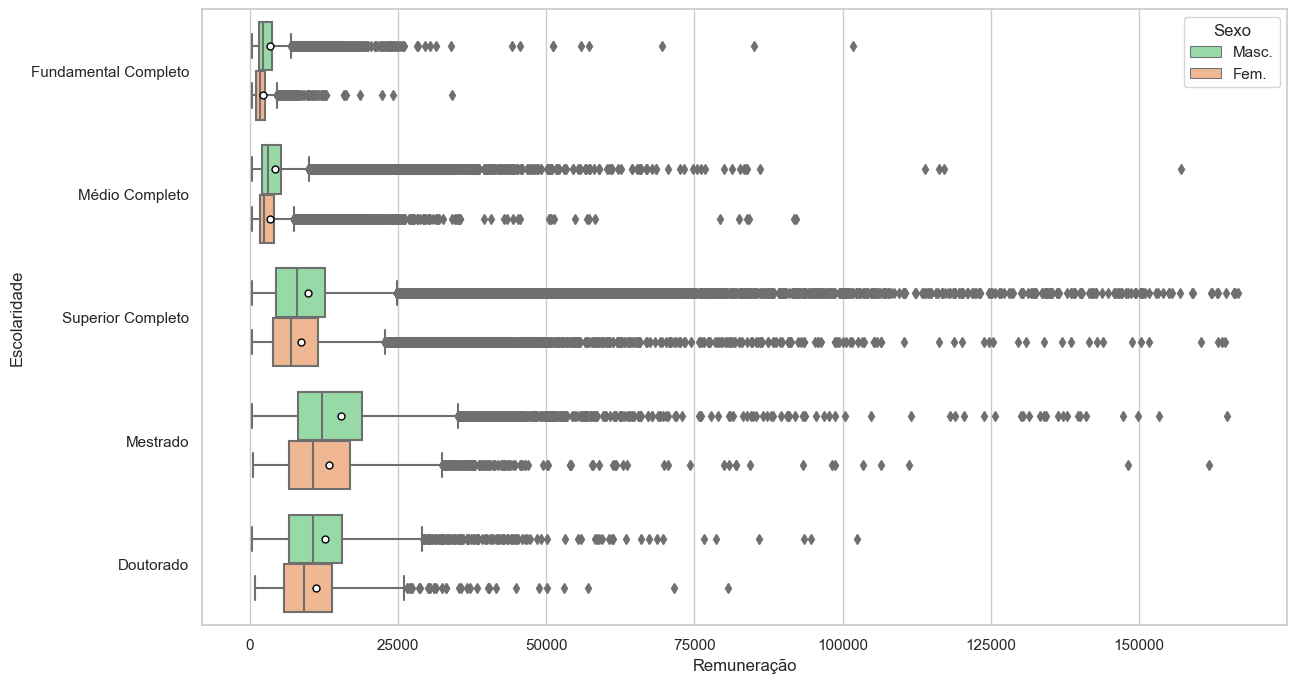

In [10]:
RAIS_GERAL_2021_BOX = RAIS_GERAL_2021.copy()
RAIS_GERAL_2021_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2021_BOX["Escolaridade"].replace(escol, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Escolaridade', hue = 'Sexo', data = RAIS_GERAL_2021_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = escol.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("C:/Users/leila/estagio/data/figures/png/boxplot_sexo_escolaridade_2021.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [11]:
# Tabela principal para média e diferença salariaL:
RAIS_GERAL_2021_MEDIA = pd.crosstab(RAIS_GERAL_2021["Escolaridade"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2021_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIA["Fem."] - RAIS_GERAL_2021_MEDIA["Masc."]) / RAIS_GERAL_2021_MEDIA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIA.rename(index = escol, inplace = True)
RAIS_GERAL_2021_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,"2,264.53","3,364.81",-32.70
Médio Completo,"3,392.28","4,344.63",-21.92
Superior Completo,"8,712.82","9,779.37",-10.91
Mestrado,"13,411.07","15,468.14",-13.30
Doutorado,"11,135.80","12,741.56",-12.60


In [12]:
RAIS_GERAL_2021_MEDIA["Ano"] = "2021"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

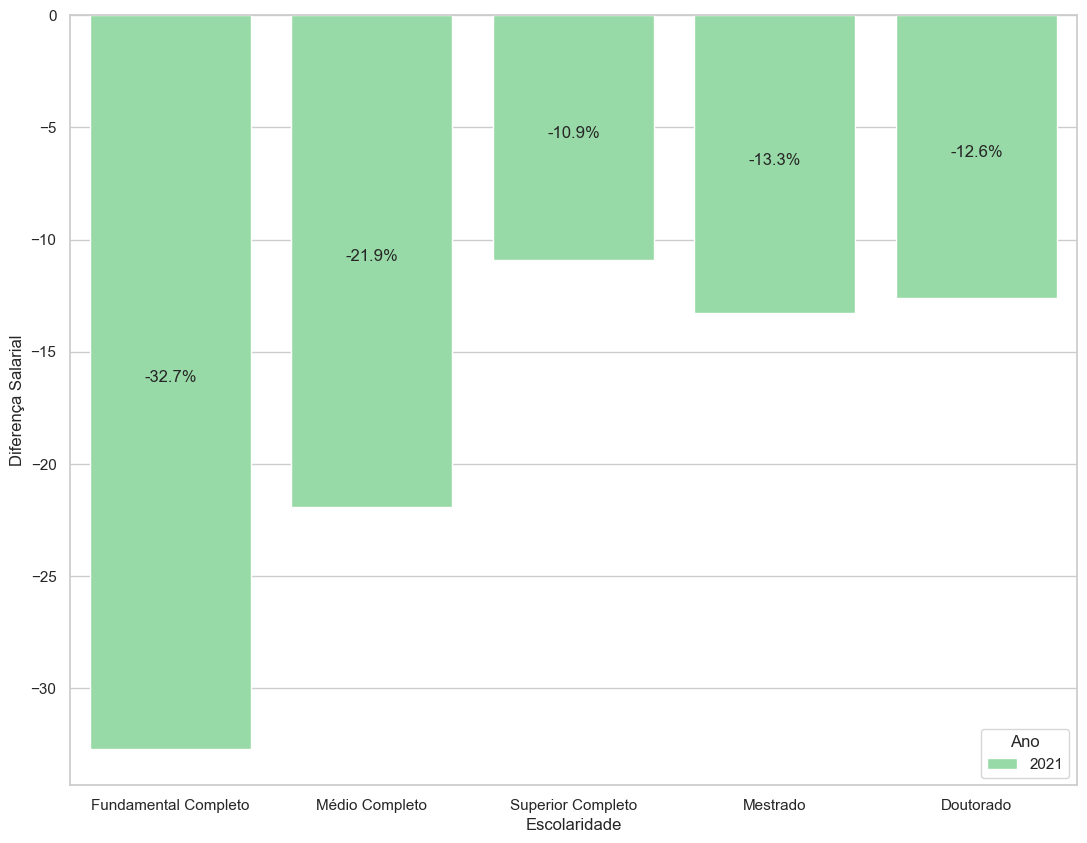

In [14]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Escolaridade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/svg/dif_salarial_sexo_escolaridade_media.svg")

In [15]:
# Tabela principal para mediana e diferença salarial :
RAIS_GERAL_2021_MEDIANA = pd.crosstab(RAIS_GERAL_2021["Escolaridade"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'median')
RAIS_GERAL_2021_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIANA["Fem."] - RAIS_GERAL_2021_MEDIANA["Masc."]) / RAIS_GERAL_2021_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIANA.rename(index = escol, inplace = True)
RAIS_GERAL_2021_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,"1,689.57","2,330.02",-27.49
Médio Completo,"2,497.17","3,094.36",-19.30
Superior Completo,"6,926.92","7,948.66",-12.85
Mestrado,"10,648.47","12,209.66",-12.79
Doutorado,"9,157.24","10,617.91",-13.76


In [16]:
RAIS_GERAL_2021_MEDIANA["Ano"] = "2021"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIANA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

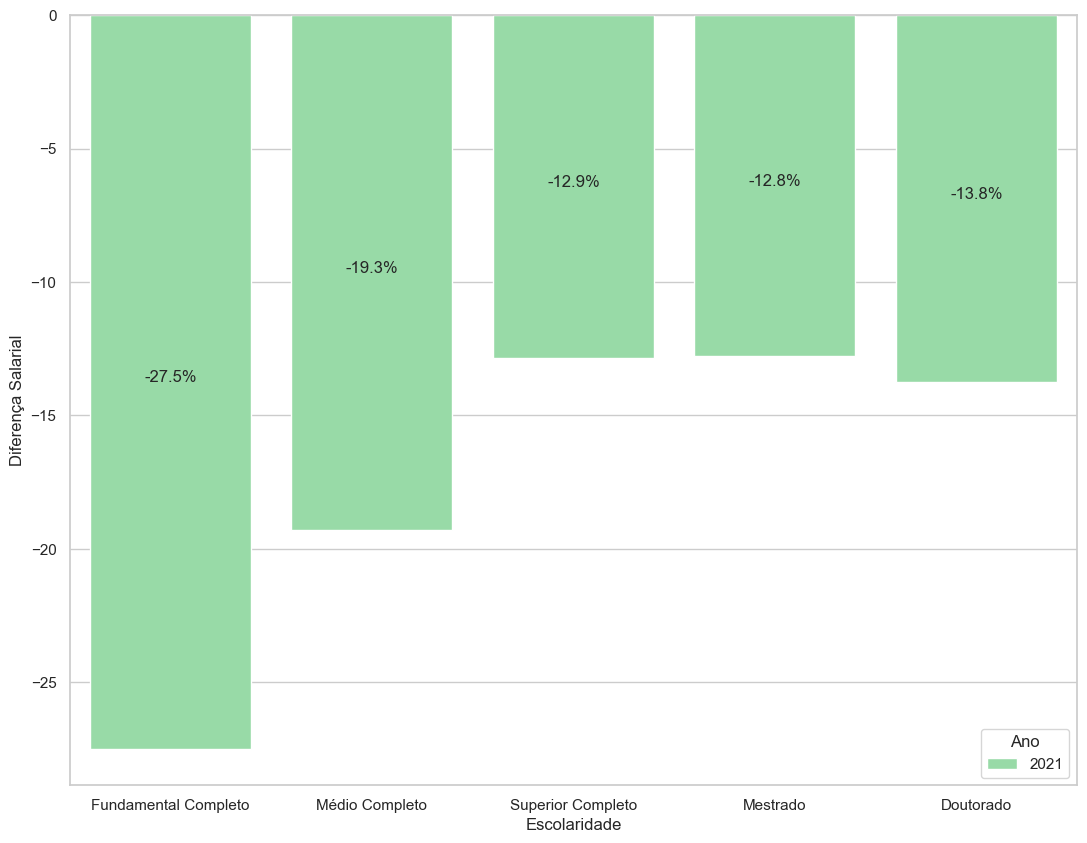

In [17]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Escolaridade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/svg/dif_salarial_sexo_escolaridade_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs:

In [18]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [19]:
TESTE_HIP_2021 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for e in escol:
    df1 = RAIS_GERAL_2021.query("Sexo == 1").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    df2 = RAIS_GERAL_2021.query("Sexo == 2").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2021.loc[escol[e]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2021_MEDIANA, TESTE_HIP_2021, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Fundamental Completo,"1,689.57","2,330.02",4267401.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Médio Completo,"2,497.17","3,094.36",3647116476.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Superior Completo,"6,926.92","7,948.66",13151341649.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Mestrado,"10,648.47","12,209.66",9191681.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Doutorado,"9,157.24","10,617.91",573717.0,0.01 > 0.00001...,Medianas estatisticamente diferentes
